#**Overview of Cat vs Dog image classifier**

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Create Files_Name
image_data='/content/drive/MyDrive/Cat and dog/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [8]:
#Create Files_Name
image_test_data='/content/drive/MyDrive/Cat and dog/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [9]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/Cat and dog/train/cat/S...,cat
1,/content/drive/MyDrive/Cat and dog/train/dog/s...,dog
2,/content/drive/MyDrive/Cat and dog/train/dog/b...,dog
3,/content/drive/MyDrive/Cat and dog/train/dog/g...,dog
4,/content/drive/MyDrive/Cat and dog/train/cat/B...,cat
...,...,...
270,/content/drive/MyDrive/Cat and dog/train/cat/P...,cat
271,/content/drive/MyDrive/Cat and dog/train/cat/B...,cat
272,/content/drive/MyDrive/Cat and dog/train/dog/p...,dog
273,/content/drive/MyDrive/Cat and dog/train/dog/w...,dog


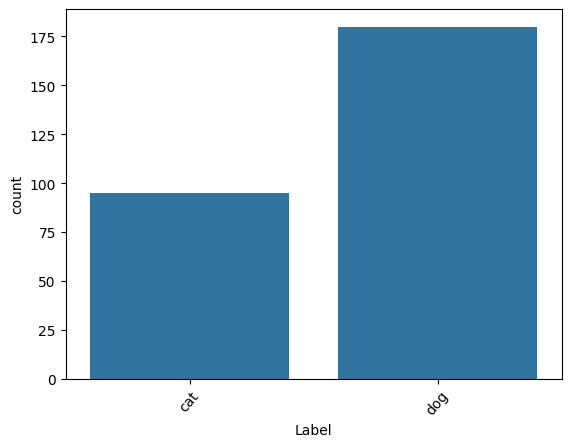

In [10]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [11]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 275 files belonging to 2 classes.
Using 220 files for training.
Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [12]:
class_names = train.class_names
class_names

['cat', 'dog']

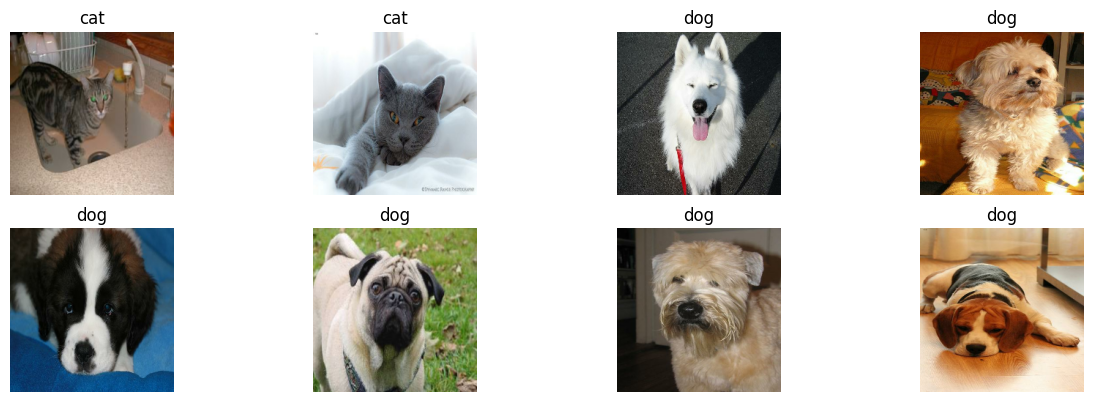

In [13]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 7056566 (26.92 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


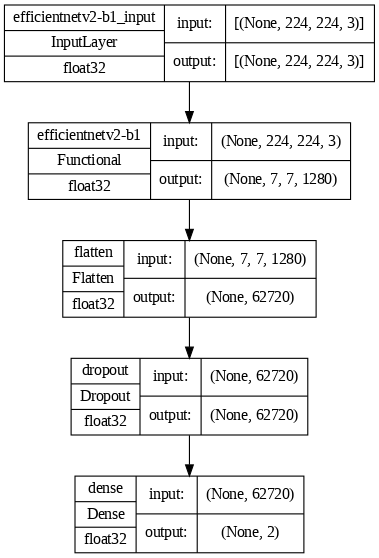

In [15]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [16]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [17]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [18]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=5,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/5
7/7 [==============================] - 45s 5s/step - loss: 0.3857 - accuracy: 0.8909 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/5
7/7 [==============================] - 27s 4s/step - loss: 0.0360 - accuracy: 0.9909 - val_loss: 1.2329e-04 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 26s 3s/step - loss: 3.4754e-04 - accuracy: 1.0000 - val_loss: 1.4305e-07 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 26s 4s/step - loss: 8.3242e-05 - accuracy: 1.0000 - val_loss: 8.0195e-08 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 23s 3s/step - loss: 6.7292e-06 - accuracy: 1.0000 - val_loss: 6.0688e-08 - val_accuracy: 1.0000


In [19]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.385739,0.890909,2.279950e-03,1.0
1,0.036003,0.990909,1.232872e-04,1.0
2,0.000348,1.000000,1.430510e-07,1.0
3,0.000083,1.000000,8.019531e-08,1.0
4,0.000007,1.000000,6.068834e-08,1.0


In [20]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 6s 2s/step - loss: 6.0688e-08 - accuracy: 1.0000
Test Loss = 6.068834323968986e-08
Test Accuracy = 1.0


In [21]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.385739,0.890909,2.279950e-03,1.0
1,0.036003,0.990909,1.232872e-04,1.0
2,0.000348,1.000000,1.430510e-07,1.0
3,0.000083,1.000000,8.019531e-08,1.0
4,0.000007,1.000000,6.068834e-08,1.0


In [23]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    image_test_data,
    image_size=(224,224),
    validation_split=None,
)

Found 70 files belonging to 2 classes.


In [24]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

3/3 [==============================] - 15s 1s/step - loss: 4.5011e-05 - accuracy: 1.0000
Test Loss = 4.5010576286586e-05
Test Accuracy = 1.0


In [25]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test

,Model,loss,accuracy
0,valid,6.068834e-08,1.0
1,test,4.501058e-05,1.0


1/1 [==============================] - 0s 119ms/step


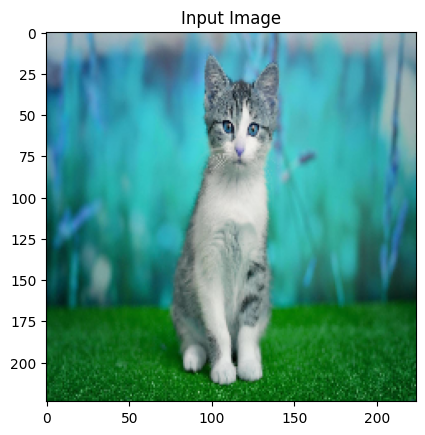

Predicted class: cat


In [28]:
import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = '/content/drive/MyDrive/Images/cat1.jpg'
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the image path.")
else:
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    # Add a batch dimension
    image = np.expand_dims(image, axis=0)

    # Make predictions
    predictions = keras_model.predict(image)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Print the input image and the predicted class
    plt.imshow(image[0])
    plt.title('Input Image')
    plt.show()
    print('Predicted class:', class_names[predicted_class]) # Make sure 'class_names' is defined